In [1]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

## Data Understanding

In [2]:
# read the data file 

df = pd.read_csv("salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
max = df[df['Salary']==df['Salary'].max()]

In [7]:
max

,YearsExperience,Salary
34,13.5,139465


In [8]:
min = df[df['Salary']==df['Salary'].min()]

In [9]:
min

,YearsExperience,Salary
2,1.5,37731


In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


## Splitting Data

In [11]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [12]:
X.shape

(35, 1)

In [13]:
y.shape

(35, 1)

In [14]:
X = np.array(X).astype('float32')
y=  np.array(y).astype('float32')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [16]:
X_train.shape

(26, 1)

In [17]:
X_test.shape

(9, 1)

## Model Selection

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.accuracy = lm.score(X_test,y_test)
lm.accuracy

0.9403971567220182

In [21]:
lm.coef_

array([[9468.396]], dtype=float32)

In [22]:
lm.intercept_

array([25317.984], dtype=float32)

In [23]:
y_predict = lm.predict(X_test)

In [24]:
y_predict

array([[147460.3  ],
       [153141.34 ],
       [134204.55 ],
       [ 52776.336],
       [ 37626.9  ],
       [ 64138.41 ],
       [ 81181.52 ],
       [141779.27 ],
       [115267.75 ]], dtype=float32)

In [25]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

8768.941

## Sagemaker 

### Parameters

In [26]:
import sagemaker
import boto3
from sagemaker import Session

In [27]:
sagemaker_session = sagemaker.Session()

In [28]:
bucket = "sagemaker-project1-salaryregression"
prefix = 'linear_learner'
role = sagemaker.get_execution_role()

In [29]:
role

'arn:aws:iam::209508272172:role/LabRole'

### Uploading train data to bucket

In [30]:
X_train.shape

(26, 1)

In [31]:
y_train.shape

(26, 1)

In [32]:
y_train

array([[ 60150.],
       [ 57189.],
       [ 93940.],
       [ 39343.],
       [112635.],
       [ 56957.],
       [ 55794.],
       [ 39891.],
       [121872.],
       [122391.],
       [ 83088.],
       [101302.],
       [ 61111.],
       [127345.],
       [105582.],
       [ 98273.],
       [ 37731.],
       [ 91738.],
       [ 63218.],
       [ 66029.],
       [ 67938.],
       [113812.],
       [ 54445.],
       [ 43525.],
       [109431.],
       [ 64445.]], dtype=float32)

In [33]:
# Converting y_train in a single vector output
y_train = y_train[:,0]

In [34]:
y_train

array([ 60150.,  57189.,  93940.,  39343., 112635.,  56957.,  55794.,
        39891., 121872., 122391.,  83088., 101302.,  61111., 127345.,
       105582.,  98273.,  37731.,  91738.,  63218.,  66029.,  67938.,
       113812.,  54445.,  43525., 109431.,  64445.], dtype=float32)

In [35]:
import io
import sagemaker.amazon.common as smac

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf,X_train,y_train)
buf.seek(0)

0

#### Uploading data to bucket

In [36]:
import os
key = 'linear-train-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(buf)

In [37]:
s3_train_data = 's3://{}/{}/train/{}'.format(bucket,prefix,key)
s3_train_data

's3://sagemaker-project1-salaryregression/linear_learner/train/linear-train-data'

### Uploading test data to bucket

In [38]:
X_test.shape

(9, 1)

In [39]:
y_test.shape

(9, 1)

In [40]:
y_test

array([[135675.],
       [139465.],
       [126756.],
       [ 56642.],
       [ 46205.],
       [ 57081.],
       [ 81363.],
       [128765.],
       [116969.]], dtype=float32)

In [41]:
# Converting y_test in a single vector output
y_test = y_test[:,0]

In [42]:
y_test

array([135675., 139465., 126756.,  56642.,  46205.,  57081.,  81363.,
       128765., 116969.], dtype=float32)

In [43]:
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf,X_test,y_test)
buf.seek(0)

0

#### Uploading data to bucket

In [44]:
key = 'linear-test-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'test',key)).upload_fileobj(buf)

In [45]:
s3_test_data = 's3://{}/{}/test/{}'.format(bucket,prefix,key)
s3_test_data

's3://sagemaker-project1-salaryregression/linear_learner/test/linear-test-data'

### Specify Output Location

In [46]:
output_location = 's3://{}//{}//output'.format(bucket,prefix)

In [47]:
print(output_location)

s3://sagemaker-project1-salaryregression//linear_learner//output


### Getting image of linear-learner

In [48]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


### Defining estimators and hyperparameters for linear-learner and fitting the data

In [50]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)
linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')
linear.fit({'train': s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-04-21-13-39-55-259


2023-04-21 13:39:56 Starting - Starting the training job...
2023-04-21 13:40:21 Starting - Preparing the instances for training...
2023-04-21 13:41:06 Downloading - Downloading input data...
2023-04-21 13:41:30 Training - Downloading the training image.........
2023-04-21 13:42:51 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/21/2023 13:42:58 INFO 139973930325824] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'a

In [51]:
# # for reducing billing time
# linear = sagemaker.estimator.Estimator(container,
#                                        role, 
#                                        train_instance_count = 1, 
#                                        train_instance_type = 'ml.c4.xlarge',
#                                        output_path = output_location,
#                                        sagemaker_session = sagemaker_session,
#                                        train_use_spot_instances=True,
#                                        train_max_run=300,
#                                        train_max_wait=600
#                                       )
# linear.set_hyperparameters(feature_dim = 1,
#                            predictor_type = 'regressor',
#                            mini_batch_size = 5,
#                            epochs = 5,
#                            num_models = 32,
#                            loss = 'absolute_loss')
# linear.fit({'train': s3_train_data})

### Deploy the code 

In [52]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-04-21-13-58-03-580
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-04-21-13-58-03-580
INFO:sagemaker:Creating endpoint with name linear-learner-2023-04-21-13-58-03-580


--------!

### Converting csv into json for endpoint 

In [53]:
from sagemaker.predictor import csv_serializer, json_deserializer
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [54]:
result = linear_regressor.predict(X_test)
result 

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 158201.1875},
  {'score': 164620.34375},
  {'score': 143223.140625},
  {'score': 51215.09765625},
  {'score': 34097.3203125},
  {'score': 64053.42578125},
  {'score': 83310.921875},
  {'score': 151782.015625},
  {'score': 121825.921875}]}

In [55]:
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([158201.1875    , 164620.34375   , 143223.140625  ,  51215.09765625,
        34097.3203125 ,  64053.42578125,  83310.921875  , 151782.015625  ,
       121825.921875  ])

In [56]:
predictions.shape

(9,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

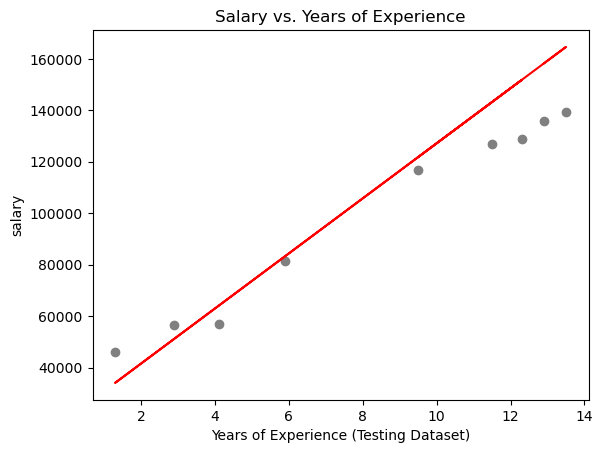

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [58]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

15610.595257283632

### Deleting endpoint

In [ ]:
linear_regressor.delete_endpoint()